In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

## Задача 1
Постройте график
Назовите график
Сделайте именование оси x и оси y
Сделайте выводы

#### 1.1. Скачать данные в закрепе к уроку (данные по недвижимости)

In [2]:
df = pd.read_csv('G:\8 Лена\GeekBrains\Питон для аналитики\Homework_2\kc_house_data.csv')
df.head()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,20141013T000000,221900.0,3,1.00,1180,5650,1.0,0,0,...,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650
1,6414100192,20141209T000000,538000.0,3,2.25,2570,7242,2.0,0,0,...,7,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639
2,5631500400,20150225T000000,180000.0,2,1.00,770,10000,1.0,0,0,...,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062
3,2487200875,20141209T000000,604000.0,4,3.00,1960,5000,1.0,0,0,...,7,1050,910,1965,0,98136,47.5208,-122.393,1360,5000
4,1954400510,20150218T000000,510000.0,3,2.00,1680,8080,1.0,0,0,...,8,1680,0,1987,0,98074,47.6168,-122.045,1800,7503


In [3]:
pd.options.display.float_format = '{:20,.2f}'.format

id
date - дата
price - цена
bedrooms – спальни
bathrooms – ванная комната
sqft_living – жилая площадь
sqft_lot –общая площадь
floors – этажи
waterfront – береговая линия
view – вид
condition – состояние
grade -класс
sqft_above – площадь застройки
sqft_basement – площадь подвала
yr_built -год постройки
yr_renovated – год ремонта капитального
zipcode – почтовый индекс
lat - широта 
long – долгота
sqft_living15 -используемая площадь(у 15)
sqft_lot15 - площадь общая(15)

#### 1.2 Изучите стоимости недвижимости

In [4]:
df.price.value_counts()

  350,000.00    172
  450,000.00    172
  550,000.00    159
  500,000.00    152
  425,000.00    150
               ... 
  607,010.00      1
1,362,500.00      1
  298,800.00      1
  957,500.00      1
  402,101.00      1
Name: price, Length: 4028, dtype: int64

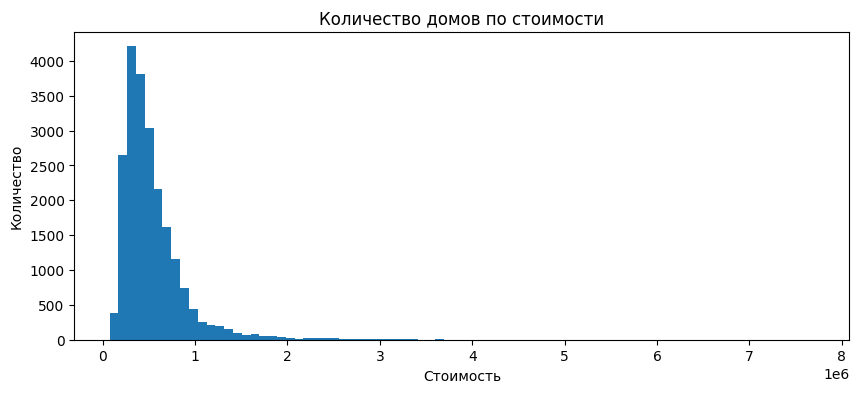

In [5]:
plt.figure(figsize= (10, 4))
plt.hist(df['price'], bins= 80)
plt.xlabel('Стоимость')
plt.ylabel('Количество')
plt.title("Количество домов по стоимости");

#### 1.3 Изучите распределение квадратуры жилой

In [6]:
df.sqft_living.value_counts()

1300    138
1400    135
1440    133
1800    129
1660    129
       ... 
9890      1
5584      1
1961      1
5720      1
1425      1
Name: sqft_living, Length: 1038, dtype: int64

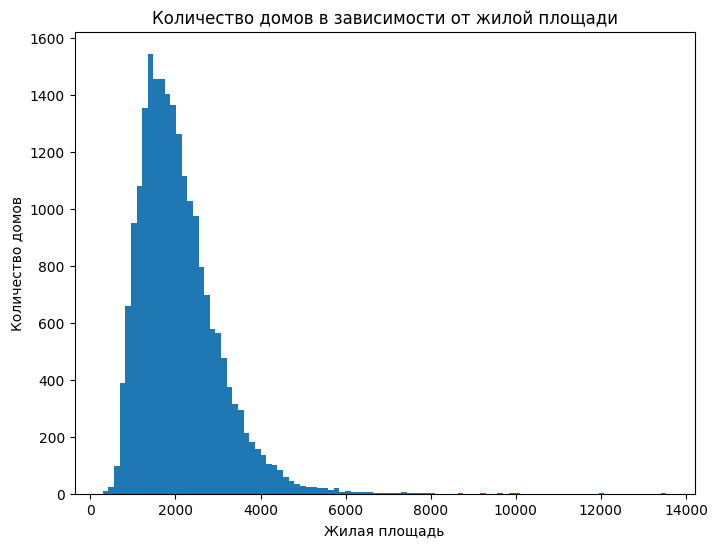

In [7]:
plt.figure(figsize= (8, 6))
plt.hist(df['sqft_living'], bins= 100)
plt.xlabel('Жилая площадь')
plt.ylabel('Количество домов')
plt.title("Количество домов в зависимости от жилой площади");

Больше всего домов с жилой площадью примерно 1500

#### 1.4 Изучите распределение года постройки

In [8]:
df.yr_built.value_counts()

2014    559
2006    454
2005    450
2004    433
2003    422
       ... 
1933     30
1901     29
1902     27
1935     24
1934     21
Name: yr_built, Length: 116, dtype: int64

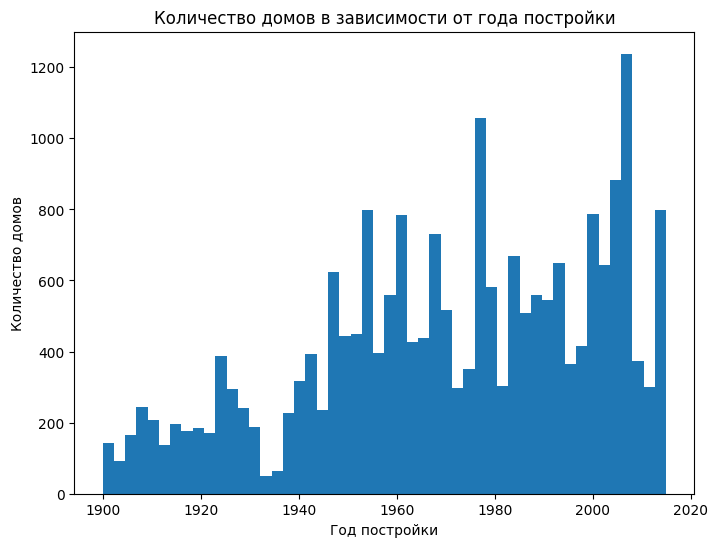

In [9]:
plt.figure(figsize= (8, 6))
plt.hist(df['yr_built'], bins= 50)
plt.xlabel('Год постройки')
plt.ylabel('Количество домов')
plt.title("Количество домов в зависимости от года постройки");

Больше всего домов 2000-х годов постройки

## Задача 2

#### 2.1 Изучите распределение домов от наличия вида на набережную
Постройте график
Сделайте выводы

In [10]:
df.waterfront.value_counts()

0    21450
1      163
Name: waterfront, dtype: int64

In [11]:
view_w = df.waterfront.value_counts()

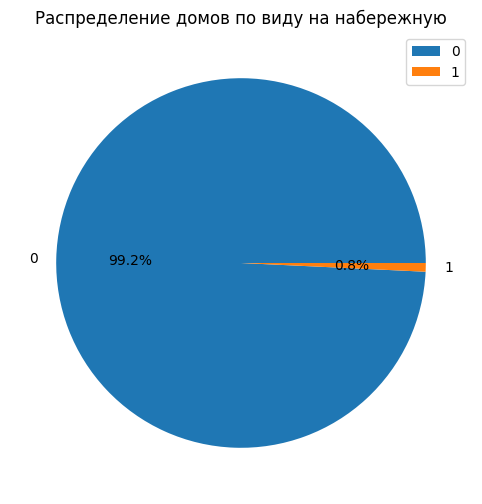

In [12]:
plt.figure(figsize= (8, 6))
plt.pie(view_w.values, autopct= '%1.1f%%', labels= view_w.index)
plt.title('Распределение домов по виду на набережную')
plt.legend(view_w.index, loc= 'best');

В основном присутствуют дома без вида на набережную

#### 2.2 Изучите распределение этажей домов

In [13]:
df.floors.value_counts()

1.00    10680
2.00     8241
1.50     1910
3.00      613
2.50      161
3.50        8
Name: floors, dtype: int64

In [14]:
floors = df.floors.value_counts()

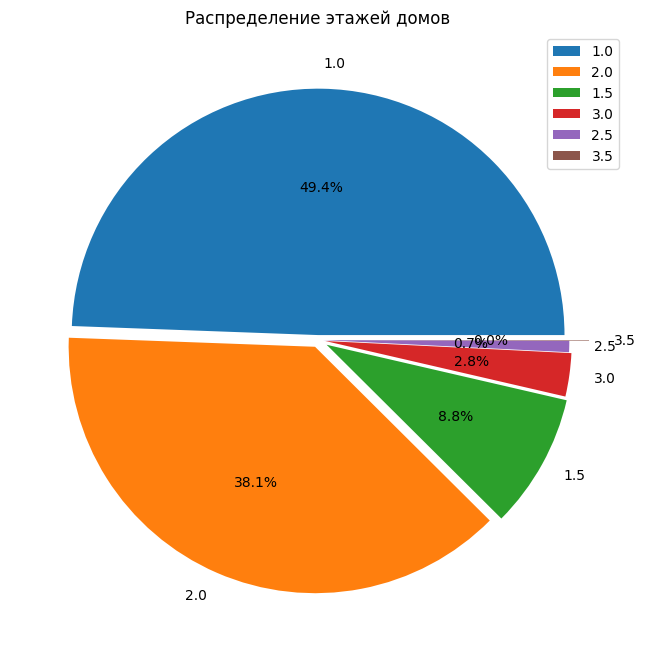

In [15]:
plt.figure(figsize= (10, 8))
explode = [0.02, 0.03, 0.04, 0.03, 0.02, 0.1]
plt.pie(floors.values, autopct= '%1.1f%%', labels= floors.index, explode= explode)
plt.title('Распределение этажей домов')
plt.legend(floors.index, loc= 'best')

Больше всего одноэтажных домов

#### 2.2 Изучите распределение состояния домов

In [16]:
df.condition.value_counts()

3    14031
4     5679
5     1701
2      172
1       30
Name: condition, dtype: int64

In [17]:
cond = df.condition.value_counts()

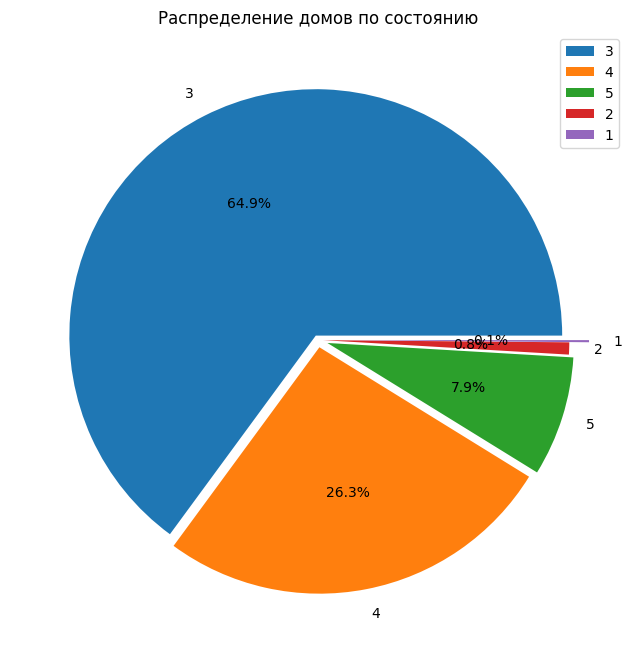

In [18]:
plt.figure(figsize= (10, 8))
explode = [0.02, 0.03, 0.04, 0.02, 0.1]
plt.pie(cond.values, autopct= '%1.1f%%', labels= cond.index, explode= explode)
plt.title('Распределение домов по состоянию')
plt.legend(cond.index, loc= 'best')

Больше всего домов со средним состоянием

## Задача 3
Исследуйте, какие характеристики недвижимости влияют на стоимость недвижимости, с применением не менее 5 диаграмм из урока.
Анализ сделайте в формате storytelling: дополнить каждый график письменными выводами и наблюдениями.

In [19]:
corr_matrix = np.round_(df.corr(), 1)
corr_matrix

C:\Users\юзер\AppData\Local\Temp\ipykernel_5840\1486970010.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corr_matrix = np.round_(df.corr(), 1)


,id,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
id,1.00,-0.00,0.00,0.00,-0.00,-0.10,0.00,-0.00,0.00,-0.00,0.00,-0.00,-0.00,0.00,-0.00,-0.00,-0.00,0.00,-0.00,-0.10
price,-0.00,1.00,0.30,0.50,0.70,0.10,0.30,0.30,0.40,0.00,0.70,0.60,0.30,0.10,0.10,-0.10,0.30,0.00,0.60,0.10
bedrooms,0.00,0.30,1.00,0.50,0.60,0.00,0.20,-0.00,0.10,0.00,0.40,0.50,0.30,0.20,0.00,-0.20,-0.00,0.10,0.40,0.00
bathrooms,0.00,0.50,0.50,1.00,0.80,0.10,0.50,0.10,0.20,-0.10,0.70,0.70,0.30,0.50,0.10,-0.20,0.00,0.20,0.60,0.10
sqft_living,-0.00,0.70,0.60,0.80,1.00,0.20,0.40,0.10,0.30,-0.10,0.80,0.90,0.40,0.30,0.10,-0.20,0.10,0.20,0.80,0.20
sqft_lot,-0.10,0.10,0.00,0.10,0.20,1.00,-0.00,0.00,0.10,-0.00,0.10,0.20,0.00,0.10,0.00,-0.10,-0.10,0.20,0.10,0.70
floors,0.00,0.30,0.20,0.50,0.40,-0.00,1.00,0.00,0.00,-0.30,0.50,0.50,-0.20,0.50,0.00,-0.10,0.00,0.10,0.30,-0.00
waterfront,-0.00,0.30,-0.00,0.10,0.10,0.00,0.00,1.00,0.40,0.00,0.10,0.10,0.10,-0.00,0.10,0.00,-0.00,-0.00,0.10,0.00
view,0.00,0.40,0.10,0.20,0.30,0.10,0.00,0.40,1.00,0.00,0.30,0.20,0.30,-0.10,0.10,0.10,0.00,-0.10,0.30,0.10
condition,-0.00,0.00,0.00,-0.10,-0.10,-0.00,-0.30,0.00,0.00,1.00,-0.10,-0.20,0.20,-0.40,-0.10,0.00,-0.00,-0.10,-0.10,-0.00


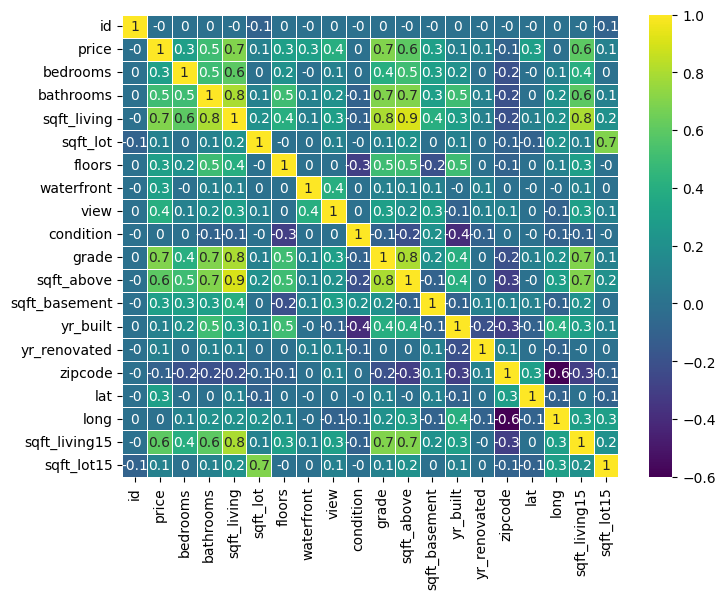

In [20]:
plt.figure(figsize=(8, 6))
sns.heatmap(corr_matrix, annot=True, linewidths=.5, cmap='viridis');

<Figure size 1200x400 with 0 Axes>

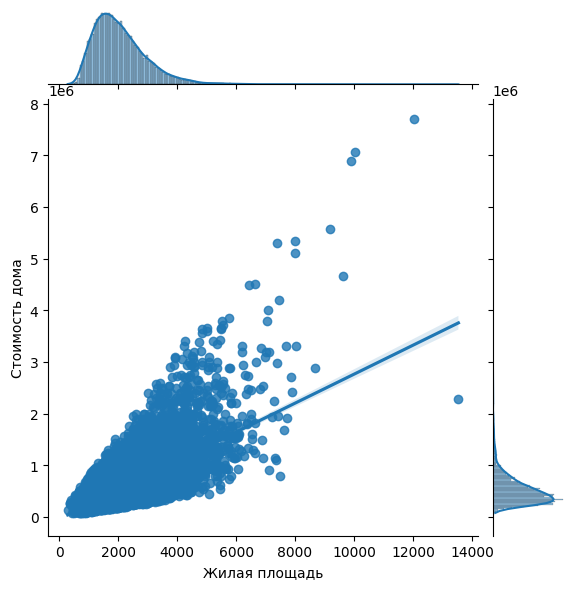

In [21]:
plt.figure(figsize=(12,4))
sns.jointplot(x=df['sqft_living'], y= df['price'], kind='reg')
plt.xlabel('Жилая площадь')
plt.ylabel('Стоимость дома')
plt.title('Зависимость стоимости дома от жилой площади', loc='center');

Согласно графикам корреляции наибольшая прямая зависимость стоимости домов от их жилой площади. Чем больше жилая площадь дома, тем выше его стоимость

Text(0.5, 1.0, 'Зависимость стоимости дома от его класса')

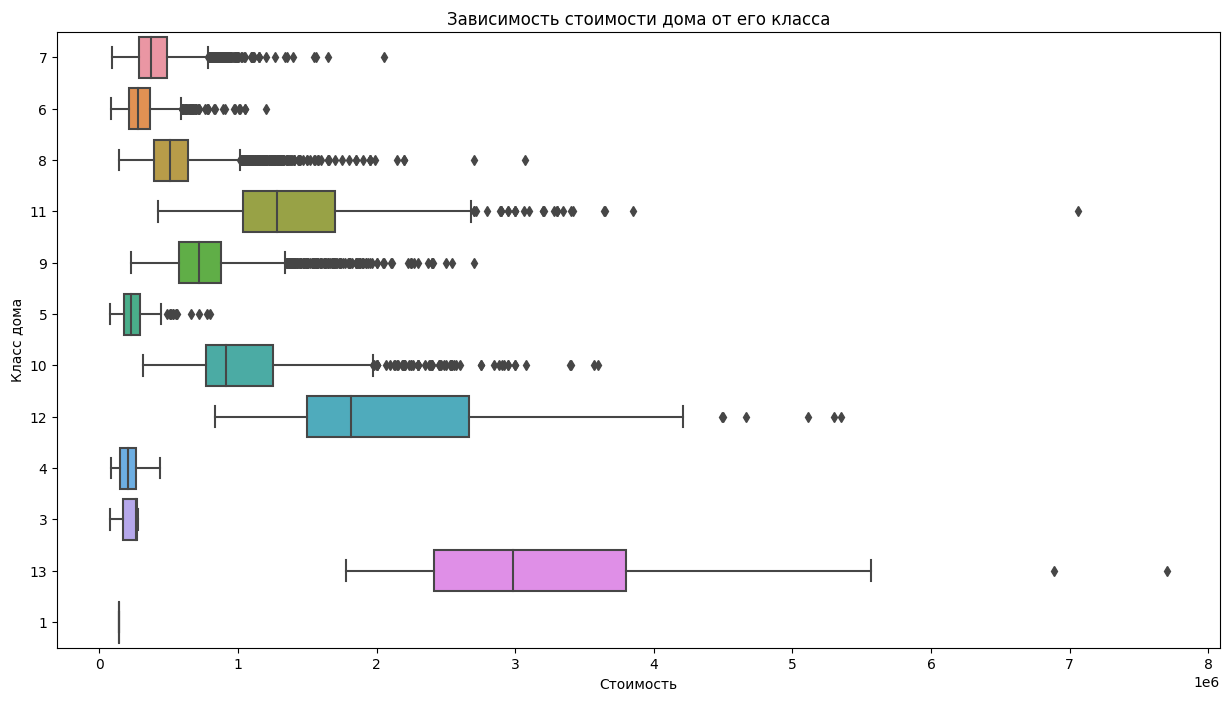

In [22]:
plt.figure(figsize= (15, 8))
sns.boxplot(x= df['price'], y= df['grade'].astype('str'), whis= 1.5)
plt.xlabel('Стоимость')
plt.ylabel('Класс дома')
plt.title('Зависимость стоимости дома от его класса')

Из данного графика видно, что чем выше класс дома, тем выше его стоимость

Text(0.5, 1.0, 'Зависимость стоимости дома от вида')

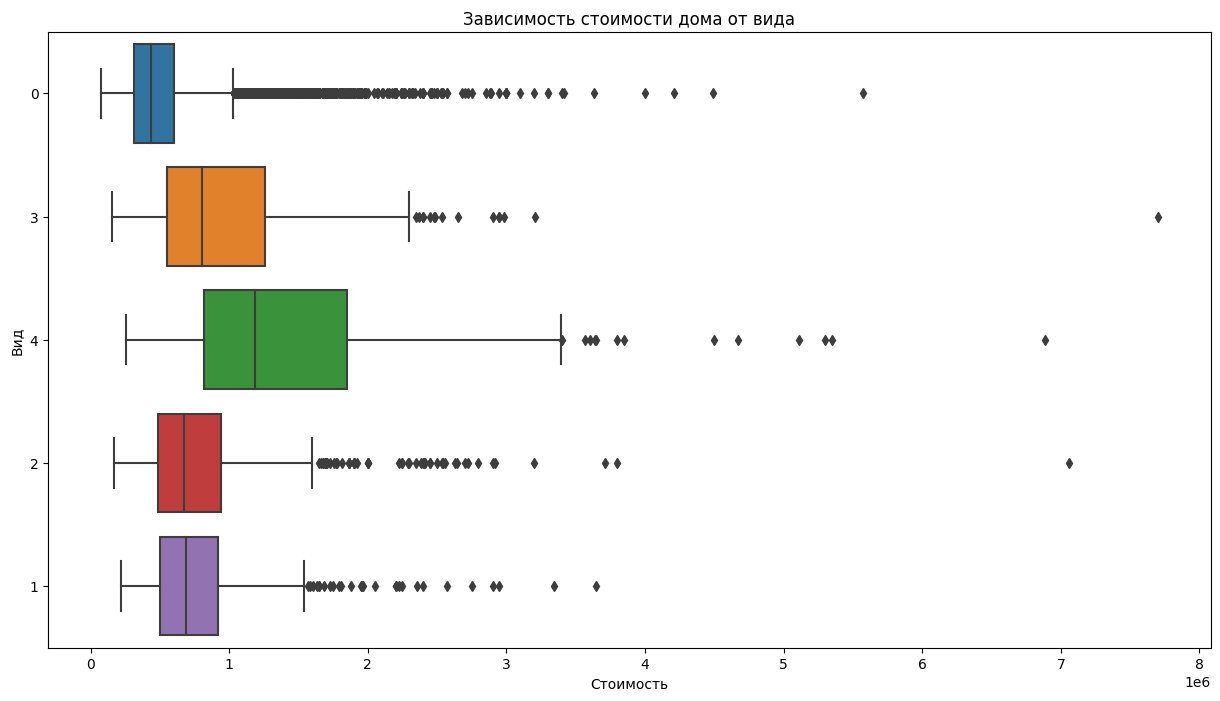

In [23]:
plt.figure(figsize= (15, 8))
sns.boxplot(x= df['price'], y= df['view'].astype('str'), whis= 1.5)
plt.xlabel('Стоимость')
plt.ylabel('Вид')
plt.title('Зависимость стоимости дома от вида')

Чем лучше вид, тем выше стоимость дома